In [350]:
#import modules for the analysis environment
import os
import matplotlib.pyplot as plta
import matplotlib as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import datetime
import ast
import gmaps
import datetime
# from config import gkey

#read cleaned csv file
df = pd.read_csv("Data/clean_data/clean_data.csv")
df.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location
0,07/06/2019,2355,N Hollywood,1591,99.0,Male,Unknown,STREET,GOODLAND AV,"(34.1371, -118.4062)"
1,07/06/2019,500,Foothill,1677,45.0,Male,White,STREET,GLENOAKS BL,"(34.2249, -118.3617)"
2,07/06/2019,1130,West Valley,1028,25.0,Male,Asian,STREET,SHERMAN WY,"(34.2012, -118.4989)"
3,07/06/2019,1415,Northeast,1153,29.0,Male,Unknown,STREET,LOS FELIZ BL,"(34.1081, -118.3078)"
4,07/06/2019,1230,Central,192,41.0,Male,Unknown,STREET,GRAND AV,"(34.0384, -118.2646)"


In [378]:
# Create DataFrame with the total counts of each ethnicity
victim_race_counts = pd.DataFrame(df['victim_race'].value_counts())
victim_race_counts

,victim_race
Hispanic,156131
White,101618
Unknown,60669
Black,58343
Asian,23383
Pacific Islander,442
American Indian,135


In [379]:
# Remove Unknown victims from DataFrame
updated_victim_race = victim_race_counts.loc[['Hispanic','White','Black',
                                              'Asian','Pacific Islander','American Indian'],
                                             ['victim_race']]
updated_victim_race

,victim_race
Hispanic,156131
White,101618
Black,58343
Asian,23383
Pacific Islander,442
American Indian,135


In [380]:
#Calculate the percentage of total crashes per ethinicity 
percent_victim_race = updated_victim_race["victim_race"]/updated_victim_race["victim_race"].sum()*100

# Add a new colum display the calculated percentage
updated_victim_race["crash_population"] = percent_victim_race
updated_victim_race

,victim_race,crash_population
Hispanic,156131,45.913860
White,101618,29.883077
Black,58343,17.157082
Asian,23383,6.876301
Pacific Islander,442,0.129980
American Indian,135,0.039700


In [381]:
# Display only the percentage of crashes per ethnicity
pct_race_df = pd.DataFrame(updated_victim_race["crash_population"])

# Format percentage calculations with two digits and percentage sign
# pct_race_df.style.format({"crash_population":"{:,.2f}%"})
pct_race_df

,crash_population
Hispanic,45.913860
White,29.883077
Black,17.157082
Asian,6.876301
Pacific Islander,0.129980
American Indian,0.039700


LA Population Composition by race
>- Hispanic: 48.2%
- White (non-hispanic): 28.5%
- Black: 9.0%
- Asian: 11.6%
- Pacific Islander: 0.2%
- American Indian: 0.4%
- Other: 0.6%

src: https://statisticalatlas.com/place/California/Los-Angeles/Race-and-Ethnicity 

In [382]:
ethn_dict = {"Hispanic":"48.2", 
             "White":"28.5", 
             "Black":"9.0", 
             "Asian":"11.6", 
             "Pacific Islander":"0.2", 
             "American Indian":"0.4"}

pct_race_df["LA_Population"] = pd.Series(ethn_dict)
multibar = pct_race_df.style.format({"crash_population":"{:,.2f}"})
multibar

,crash_population,LA_Population
Hispanic,45.91,48.2
White,29.88,28.5
Black,17.16,9.0
Asian,6.88,11.6
Pacific Islander,0.13,0.2
American Indian,0.04,0.4


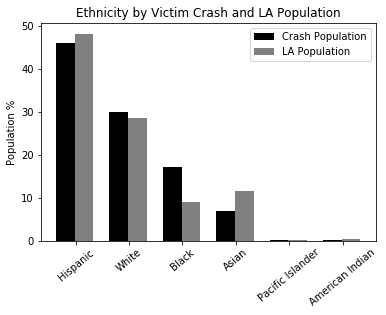

In [376]:
xaxis = ("H", "W", "B", "A", "P", "I")
crash_pop = (45.91, 29.88, 17.16, 6.88, 0.13, .04)
la_pop = (48.2, 28.5, 9, 11.6, .2, .4)

ind = np.arange(len(xaxis))
width = 0.35

plta.bar(ind - width/2, crash_pop, width, color="black", label="Crash Population")
plta.bar(ind + width/2, la_pop, width, color="gray", label="LA Population")

plta.title("Ethnicity by Victim Crash and LA Population")
plta.ylabel("Population %")

plta.xticks(ind + width/20, ("Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"), rotation = 40)
plta.legend(loc="best")

plta.show()

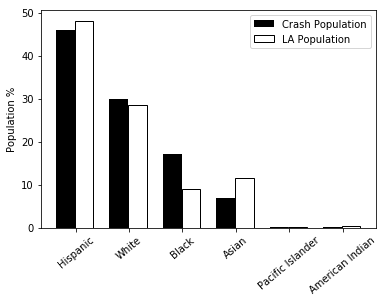

In [377]:
xaxis = ("H", "W", "B", "A", "P", "I")
crash_pop = (45.91, 29.88, 17.16, 6.88, 0.13, .04)
la_pop = (48.2, 28.5, 9, 11.6, .2, .4)

ind = np.arange(len(xaxis))
width = 0.35

plta.bar(ind - width/2, crash_pop, width, color="black", label="Crash Population")
plta.bar(ind + width/2, la_pop, width, color="white", edgecolor='black', label="LA Population")

# plta.title("Ethnicity by Victim Crash and LA Population")
plta.ylabel("Population %")

plta.xticks(ind + width/20, ("Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"), rotation = 40)
plta.legend(loc="best")

plta.show()

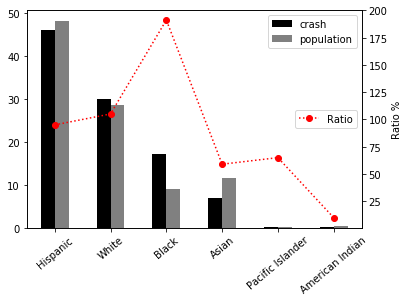

In [383]:
ratio = [95, 105, 191, 59, 65, 10]
xaxis = ["Hispanic", "White", "Black", "Asian", "Pacific Islander", "American Indian"] 
crash = (45.91, 29.88, 17.16, 6.88, 0.13, .04)
la_pop = (48.2, 28.5, 9, 11.6, .2, .4)
width = 0.35
ind = np.arange(len(xaxis))
crash_data = pd.DataFrame(crash,xaxis)
crash_data[1] = la_pop
crash_data = crash_data.rename(columns = {0:'crash',1:'population'})
crash_fig = crash_data.plot(kind='bar', color=["black", "gray"], use_index=True)
line_data = crash_fig.twinx()
line_fig = line_data.plot(ratio, linestyle=':',marker='o',color='red', label='Ratio')

plta.legend(loc="right")
crash_fig.legend(loc="best")

# plta.legend((crash, population, ratio), ("Crash", "Population", "Ratio"))
# plta.title("Ethnicity by Victim Crash and LA Population")
plta.ylabel("Ratio %")
crash_fig.tick_params(axis='x', rotation=40)

## 

In [113]:
# Create DataFrame with the total counts of each ethnicity
sex_race_counts = pd.DataFrame(df['victim_sex'].value_counts())
sex_race_counts

,victim_sex
Male,234600
Female,165158
Unknown,963


In [371]:
sex_pct = sex_race_counts/sex_race_counts.sum()*100
sex_pct
sex_pct = sex_pct.loc[["Male", "Female"]]
sex_pct

,victim_sex
Male,58.544474
Female,41.215210


In [372]:
gender_pop = {"Male": "0.492531",
              "Female": "0.507468"}
sex_pct["pop_pct"] = pd.Series(gender_pop)
sex_pct

,victim_sex,pop_pct
Male,58.544474,0.492531
Female,41.215210,0.507468


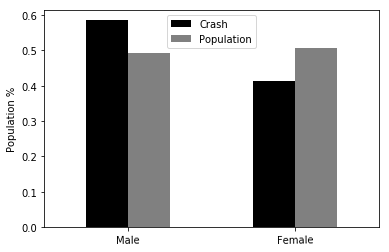

In [288]:
ratio = [118.86, 81.22]
xaxis = ['Male', 'Female'] 
crash = (.5854, .4122)
la_pop = (.4925, .5075)
width = 0.3
ind = np.arange(len(xaxis))
gender_data = pd.DataFrame(crash,xaxis)
gender_data[1] = la_pop
gender_data = gender_data.rename(columns = {0:'Crash',1:'Population'})
gender_fig = gender_data.plot(kind='bar', color=["black", "gray"], use_index=True)

# rects = gender_fig.patches
# labels=gender_data.gender_data[1].tolist()
# sum_labels = sum(labels)
# perc_labels = [round(i/sum_labels*100,2) for i in labels]
# perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]
# for rect,label in zip(rects,perc_labels):
#       gender_fig.text(rect.get_x()+rect.get_width()/2,rect.get_height(),label,ha='center',va=
#               'bottom')

plta.legend(loc="center")
gender_fig.legend(loc="best")

# plta.legend((crash, population, ratio), ("Crash", "Population", "Ratio"))
# plta.title("Ethnicity by Victim Crash and LA Population")
plta.ylabel("Population %")
gender_fig.tick_params(axis='x', rotation=1)

In [151]:
male_pct = 4982799/10116705
print(male_pct)

female_pct = 5133906/10116705
print(female_pct)

male_ratio = .585445/male_pct*100
print(male_ratio)

female_ratio = (.412152/female_pct)*100
print(female_ratio)

0.49253180754010323
0.5074681924598968
118.86440449885696
81.21730703990295


## Age mean per Ethnicity

>- Children: less than 18 years old
- College: from 18 to 21 years old
- Younger Adult: from 22 to 39 years old
- Older Adult: from 40 to 64 years old
- Senior: more than 64 years old

In [384]:
#create bins to extract age range
bins = [0,19,22,40,65, float("inf")]
age = ["Children ( < 18 years old )",
       "College ( 18 to 21 years old )",
       "Younger Adult ( 22 to 39 years old )",
       "Older Adult ( 40 to 64 years old )",
       "Senior ( > 64 years old )"]

df['Age Category'] = pd.cut(df['victim_age'],bins, right=False, labels=age)

age_group = df.groupby("Age Category")
print(age_group["victim_race", "victim_age"].mean())

age_count["age_count"] = age_group[["victim_age"]].count()
age_count["age_mean"] = age_group["victim_age"].mean()
age_df = age_count[["age_count","age_mean"]]
age_df

                                      victim_age
Age Category                                    
Children ( < 18 years old )            17.578563
College ( 18 to 21 years old )         20.504053
Younger Adult ( 22 to 39 years old )   29.902646
Older Adult ( 40 to 64 years old )     50.168594
Senior ( > 64 years old )              76.831921


,age_count,age_mean
Age Category,,
Children ( < 18 years old ),821,17.578563
College ( 18 to 21 years old ),18256,20.504053
Younger Adult ( 22 to 39 years old ),186505,29.902646
Older Adult ( 40 to 64 years old ),161744,50.168594
Senior ( > 64 years old ),33395,76.831921


In [385]:
print(age_df["age_count"].sum())
age_total_crash = age_df["age_count"].sum()
age_df["age_pct"]= age_df["age_count"]/age_total_crash*100
age_df

400721


,age_count,age_mean,age_pct
Age Category,,,
Children ( < 18 years old ),821,17.578563,0.204881
College ( 18 to 21 years old ),18256,20.504053,4.555788
Younger Adult ( 22 to 39 years old ),186505,29.902646,46.542357
Older Adult ( 40 to 64 years old ),161744,50.168594,40.363245
Senior ( > 64 years old ),33395,76.831921,8.333728


In [386]:
age_group = df.groupby(["Age Category", "victim_race"])
age_df["age_count"] = age_group[["victim_age"]].count()
# age_total_crash = age_df["age_count"].sum()
# age_df["age_pct"]= age_df["age_count"]/age_total_crash*100

age_df

TypeError: incompatible index of inserted column with frame index